#### Principal Component Analysis (PCA)
PCA is a technique used to reduce the variables of a dataset. This is done so that we can have minimum number of variables with maximum information about how it is distributed and we can reprsent our data in a teo diminesional plot.

###### Wine data
The 'wine' data are the results of a chemical analysis of wines grown in a region in Italy but derived from three different cultivars. There are 13 variables in the dataset and they are the constituents found in each of the three types of wines. 
The variables are:
1) Alcohol 
2) Malic acid 
3) Ash
4) Alcalinity of ash 
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline 

### Clustering Algorithm with first three variables of "wine" dataset

As it is difficult to visualize clusters with 13 variables, I am considering only the first three variables here(Alcohol, Malic acid, Ash) and implementing K-means on that.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

wines = pd.read_csv("data/wine.csv")
wines.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wines.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##### Dropping the class variable

In [4]:
wine = wines.drop('Wine', axis=1)

In [5]:
wine.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [6]:
wine.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###### Standardizing the data
As PCA maximizes the variance, it is better to standardize the data so that all variables are on same scale and have a mean 0 and variance 1.

In [7]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine)

#### Three principal components (n=3)
By specifying the number of principal components (here n=3), we reduce the dataset to that many dimensions.

In [8]:
pca = PCA(n_components=3)
pca_wine = pca.fit_transform(wine_std)

###### Shape of data after dimension reduction using PCA

In [9]:
pca_wine.shape

(178, 3)

###### PCA explained_variance_ration gives a vector of the variance explained by each dimension

In [10]:
pca.explained_variance_ratio_

array([ 0.36198848,  0.1920749 ,  0.11123631])

In [11]:
sum(pca.explained_variance_ratio_)

0.66529968893185254

###### Plotting the three principal components (eigen vectors)

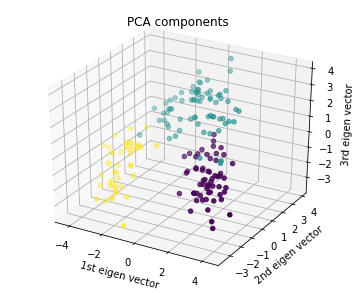

In [12]:
% matplotlib inline

fig = plt.figure(1, figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_wine[:, 0], pca_wine[:, 1], pca_wine[:, 1], c=wines.iloc[:,0], cmap='viridis')

ax.set_title("PCA components")
ax.set_xlabel("1st eigen vector")
ax.set_ylabel("2nd eigen vector")
ax.set_zlabel("3rd eigen vector")

plt.show()

## k-Means Clustering
k-means is an unsupervised learning, clustering algorithm. it requires the number of clusters to be specified for the data to be divided into clusters. This algorithm works by iteratively grouping data based on the similarity of features. From the algorithm we get the centroids of the clusters and the labels for the data points i.e., the cluster to which the data point is assigned. 
Number of clusters is determined by plotting the mean distance to centroid of each group and the 'elbow point' where there is a shift can be taken as 'k' value. 

### Elbow method to find the optimal number of clusters
As we can see in the below plot, the elbow is located at k = 3, which suggests that k = 3 is a good choice for this 'wine' dataset

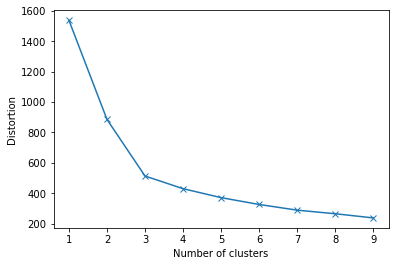

In [13]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm

distortions = []

for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(pca_wine)
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics

model = KMeans(n_clusters=3)
model.fit(pca_wine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

###### Running predict on the training set returns the same as labels_

In [16]:
y_pred = model.predict(pca_wine)
print(y_pred)
print(len(y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
178


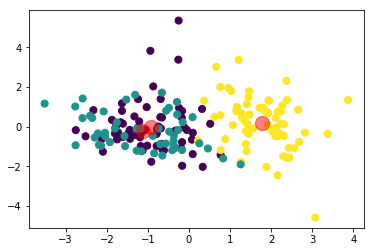

In [17]:
plt.scatter(pca_wine[:, 1], pca_wine[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.5)

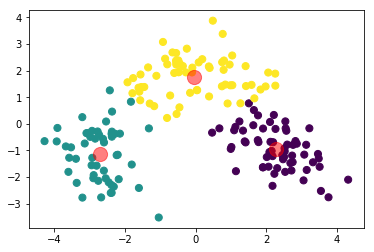

In [18]:
plt.scatter(pca_wine[:, 0], pca_wine[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

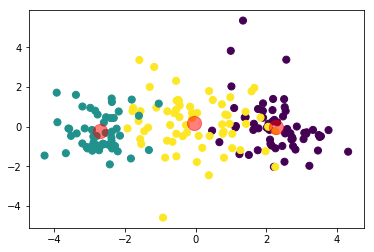

In [19]:
plt.scatter(pca_wine[:, 0], pca_wine[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=200, alpha=0.5)

We don't have clusters defined before hand in real world, but in this data we already know the clusters. So I compared the obtained clusters with the known classifications.

In [20]:
pd.crosstab(y_pred, wines.Wine)

Wine,1,2,3
row_0,,,
0,59,3,0
1,0,3,48
2,0,65,0


<IPython.core.display.Javascript object>


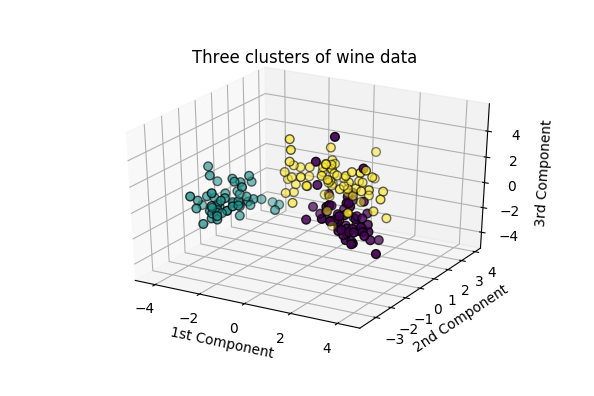

In [23]:
%matplotlib notebook


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_wine[:, 0], pca_wine[:, 1], pca_wine[:, 2], c=y_pred, cmap='viridis', edgecolor='k', s=40)

ax.set_title("Three clusters of wine data")

ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.set_zlabel("3rd Component")


plt.show()

### References

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html<br>
https://archive.ics.uci.edu/ml/datasets/wine<br>
http://www.shichaoji.com/2017/02/16/unsupervised-learning-1/<br>
http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html <br>
https://plot.ly/ipython-notebooks/principal-component-analysis/ <br>
https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka